## SPAM OR HAM DETECTION USING NAIVE BAYES

### 1. Introduction
* Brief overview of the task.
    * The task involves building a classifier that can categorize emails as either 'spam' (unsolicited commercial emails) or 'ham' (legitimate emails). To accomplish this, you will use the Naive Bayes algorithm, which is a probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions between the features.
* Answer the questions like, What are the main components of a Naive Bayes classifier?, Why do we use Naive Bayes in text classification tasks?, What is the significance of Laplace smoothing in Naive Bayes? etc.
    * What are the main components of a Naive Bayes classifier?
        * Prior Probability: The initial probability of an event (in this case, an email being spam or ham) before any additional information is provided.
        * Prior Probability: The initial probability of an event (in this case, an email being spam or ham) before any additional information is provided.
        * Posterior Probability: The probability of the class label given the observed data, which is calculated using Bayes' theorem. 
    * Why do we use Naive Bayes in text classification tasks?
        * Simplicity: It is easy to implement and understand.
        * Efficiency: It is computationally efficient, as it involves simple counting and probability calculations.
        * Performance: Despite the simplicity, it often performs well in practice, especially in text classification.
        * Scalability: It scales well with the dimensionality of the data, which is typically high in text-related tasks due to large vocabularies.
        * Baseline Model: It serves as a good baseline model to compare against more complex algorithms.
    * What is the significance of Laplace smoothing in Naive Bayes?
        * Laplace smoothing, also known as additive smoothing, is significant for several reasons:
            * Zero Probability Problem: Without smoothing, if a word in the test set never appeared in the training set for a particular class, the entire probability of the document being in that class would be zero. This is not desirable as it disregards other evidence.
            * Generalization: Smoothing allows the model to better generalize by assigning a small non-zero probability to unseen words. 
            * Stability: It stabilizes the probability estimates by ensuring that there are no infinite weights due to zero counts.
            
* Description of the dataset used for text classification.

### 2. Importing Necessary Libraries and Reading the Data

In [92]:
## Import necessary libraries
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.metrics import accuracy_score, classification_report
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer  
from sklearn.model_selection import train_test_split


## Read csv data

df = pd.read_csv('emails.csv')


### 3. Data Understanding and Preperation

* Examine the E-Mail Spam Dataset to understand its structure and contents.
* Using the histograms show the distribution of dataset into the spam and ham
emails. (or you can use pie chart)
* Assess the feasibility of current dataset to predict spam or ham based on the
words present in the email text.
* To do so, calculate the frequencies of the words in spam and ham emails. You
can create a frequency dictionary to effectively examine the words and use
them later for Naive Bayes classification.
* Based on the word frequencies, consider leaving out some unique words that
appear less frequently than a specific frequency or appear more frequently than
a specific frequency since they might not be useful. To decide the threshold,
you might need to plot the word frequencies and see in which range of the
frequencies most words are found. Explain why some words might not be
useful for prediction and show your reasoning.
* Provide three examples of keywords that may be indicative of spam or ham,
along with their respective frequencies in spam and ham emails. To decide
this you can use a scatter plot to visualize the word frequencies in logarithmic
scale. You can also choose another visualization process that might help you
to decide. Explain and show your reasoning.

In [93]:
# Examine the E-Mail Spam Dataset to understand its structure and contents.

print("Display the first few rows of the DataFrame")
print(df.head())
print()

print("Display the structure of the DataFrame")
print(df.info())
print()

print("Get a summary of statistics for numeric columns")
print(df.describe())
print()

print("Check for missing values")
print(df.isnull().sum())

Display the first few rows of the DataFrame
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1

Display the structure of the DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
None

Get a summary of statistics for numeric columns
              spam
count  5728.000000
mean      0.238827
std       0.426404
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000

Check for missing values
text    0


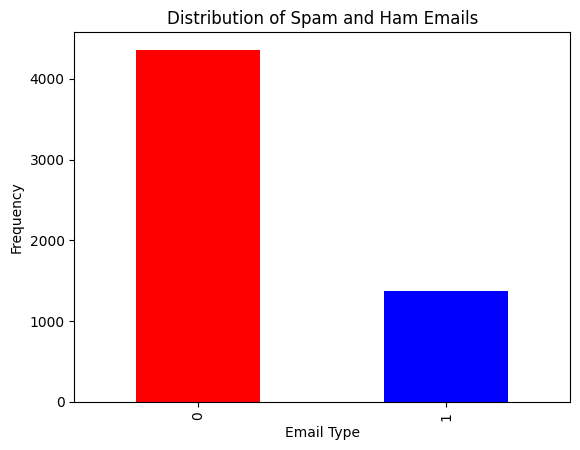

In [94]:
# Using the histograms show the distribution of dataset into the spam and ham emails. (or you can use pie chart)

df['spam'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Distribution of Spam and Ham Emails')
plt.xlabel('Email Type')
plt.ylabel('Frequency')
plt.show()

In [95]:
# Assess the feasibility of current dataset to predict spam or ham based on the words present in the email text. 



In [96]:
# To do so, calculate the frequencies of the words in spam and ham emails. You can create a frequency dictionary to effectively examine the words and use them later for Naive Bayes classification.

spam_word_freq = defaultdict(int)
ham_word_freq = defaultdict(int)

def tokenize(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    words = text.split()  # split into words
    return words

for index, row in df.iterrows():
    words = tokenize(row['text']) 
    if row['spam']:  
        for word in words:
            spam_word_freq[word] += 1
    else:
        for word in words:
            ham_word_freq[word] += 1



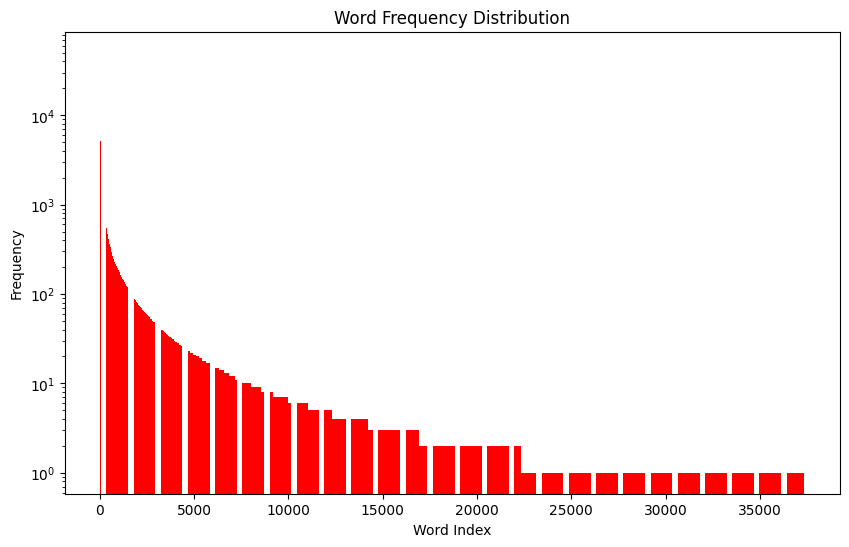

In [97]:
# Based on the word frequencies, consider leaving out some unique words that appear less frequently than a specific frequency or appear more frequently than a specific frequency since they might not be useful. To decide the threshold, you might need to plot the word frequencies and see in which range of the frequencies most words are found. Explain why some words might not be useful for prediction and show your reasoning.

combined_freq = defaultdict(int)
for word, freq in spam_word_freq.items():
    combined_freq[word] += freq
for word, freq in ham_word_freq.items():
    combined_freq[word] += freq

sorted_word_freq = sorted(combined_freq.items(), key=lambda item: item[1], reverse=True)

words, freqs = zip(*sorted_word_freq)


plt.figure(figsize=(10, 6))
plt.bar(range(len(words)), freqs, color='red')  
plt.xlabel('Word Index')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale on the y-axis
plt.title('Word Frequency Distribution')
plt.show()

buy is 173
free is 606
money is 662


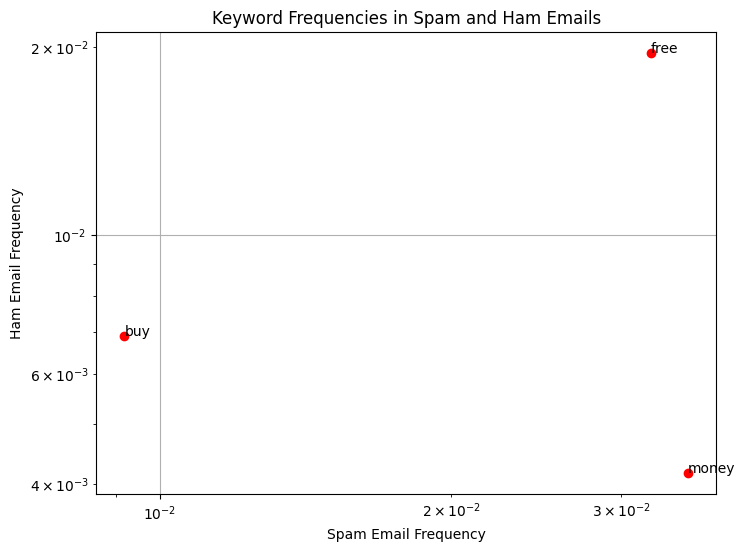

In [98]:
# Provide three examples of keywords that may be indicative of spam or ham, along with their respective frequencies in spam and ham emails. To decide this you can use a scatter plot to visualize the word frequencies in logarithmic scale. You can also choose another visualization process that might help you to decide. Explain and show your reasoning.


words = ["buy", "free", "money"]
print("buy is", spam_word_freq["buy"])
print("free is", spam_word_freq["free"])
print("money is", spam_word_freq["money"])

spam_freqs = [(spam_word_freq[word] / len(spam_word_freq)) for word in words]
ham_freqs = [(ham_word_freq[word] / len(ham_word_freq))for word in words]

plt.figure(figsize=(8, 6))
plt.scatter(spam_freqs, ham_freqs, color='red')

for i, word in enumerate(words):
    plt.annotate(word, (spam_freqs[i], ham_freqs[i]))

plt.xscale('log')
plt.yscale('log')

plt.title('Keyword Frequencies in Spam and Ham Emails')
plt.xlabel('Spam Email Frequency')
plt.ylabel('Ham Email Frequency')
plt.grid(True)
plt.show()

### 4. Data Representation and Naive Bayes Implementation

* Split your dataset into training and test sets (80-20 split ratio).
* Prepare your training and test data to align with the requirements of your
Naive Bayes implementation. Remember, the training data will provide the
necessary insights to predict whether the test data is spam or ham.
* Represent the data using the Bag of Words (BoW) model with two methods:
Unigram and Bigram. You need to compare the usage of these two methods.
* Create Unigrams and Bigrams then implement your own Naive Bayes classifier,
considering:

  1.   Log probabilities to prevent numerical underflow.
  2.   Dealing with words not encountered during training (possibly using Laplace
  smoothing).
  3. Using a dictionary for BoW representation (either implementing your own
  method or utilizing CountVectorizer from scikit-learn)

#### Splitting the Data

In [99]:
X = df['text']
y = df['spam']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer_unigram = CountVectorizer(ngram_range=(1, 1))
X_train_unigram = vectorizer_unigram.fit_transform(X_train).toarray()
X_test_unigram = vectorizer_unigram.transform(X_test).toarray()


vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))
X_train_bigram = vectorizer_bigram.fit_transform(X_train).toarray()
X_test_bigram = vectorizer_bigram.transform(X_test).toarray()



#### Naive Bayes Implementation

In [100]:
class NaiveBayes:
    def __init__(self):
        self.classes = [0, 1]
        self.class_priors = {0: 0, 1: 0}
        self.feature_probs = {}
        

    def fit(self, X, y):
        
        n_samples, n_features = X.shape
        self.class_priors = {c: np.sum(y == c) / n_samples for c in self.classes}
        
        self.feature_probs = {c: np.zeros(n_features) for c in self.classes}
        
        for c in self.classes:
            X_c = X[y == c]
            self.feature_probs[c] = (np.sum(X_c, axis=0) + 1) / (X_c.shape[0] + 2)
            
    def predict(self, X):
        y_pred = []
        for x in X:
            y_pred.append(self.predict_for_sample(x))
        return np.array(y_pred)
    
    def predict_for_sample(self, x):
        posteriors = {}
        
        for c in self.classes:
            prior = np.log(self.class_priors[c])
            conditional = np.sum(np.log(self.feature_probs[c]) * x)
            posteriors[c] = prior + conditional
        
        if posteriors[0] > posteriors[1]:
            return 0
        else:
            return 1


* Unigrams
    * Definition: Unigrams are single words extracted from the text.
    * Example: From the email "Free money now", the unigrams would be ["Free", "money", "now"].
    * Advantages of Unigrams:
        * Simplicity: Easier to implement and interpret. Each word is treated independently.
        * Lower Dimensionality: Unigrams result in fewer features compared to bigrams, which can simplify the model and reduce computational resources.
        * Training Data Efficiency: Requires less training data to learn meaningful patterns, as each word's occurrence is a potential feature.
    * Disadvantages of Unigrams:
        * Context Ignorance: Unigrams ignore the context in which words appear, potentially losing valuable information about word relationships.
        * Ambiguity: Words with multiple meanings (polysemy) and phrases with different interpretations are not captured well.
* Bigrams
    * Definition: Bigrams are pairs of consecutive words extracted from the text.
    * Example: From the email "Free money now", the bigrams would be ["Free money", "money now"].
    * Advantages of Bigrams:
        * Context Capture: Bigrams capture some contextual information by considering word pairs, which can help disambiguate words and understand common phrases better.
        * Phrase Detection: Bigrams can identify common spam phrases (e.g., "click here", "free money") that unigrams might miss.
    * Disadvantages of Bigrams:
        * Higher Dimensionality: Bigrams significantly increase the number of features, which can complicate the model and require more computational resources.
        * Sparse Data: The frequency of specific bigrams can be low, leading to sparse data issues where many bigram features may not appear frequently enough to be useful.
        * More Training Data: Bigrams generally require more training data to achieve reliable results, as the model needs to learn the associations between word pairs.


#### Training with Unigram

In [101]:
nb_unigram = NaiveBayes()
nb_unigram.fit(X_train_unigram, y_train)

#### Testing with Unigram

In [102]:
y_pred_unigram = nb_unigram.predict(X_test_unigram)
print("Unigram Accuracy:", accuracy_score(y_test, y_pred_unigram))
print("Unigram Classification Report:\n", classification_report(y_test, y_pred_unigram))

Unigram Accuracy: 0.9825479930191972
Unigram Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       856
           1       0.99      0.94      0.96       290

    accuracy                           0.98      1146
   macro avg       0.99      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146


#### Training and Testing with Bigram

In [103]:
nb_bigram = NaiveBayes()
nb_bigram.fit(X_train_bigram, y_train)
y_pred_bigram = nb_bigram.predict(X_test_bigram)
print("Bigram Accuracy:", accuracy_score(y_test, y_pred_bigram))
print("Bigram Classification Report:\n", classification_report(y_test, y_pred_bigram))


Bigram Accuracy: 0.9799301919720768
Bigram Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       856
           1       0.94      0.98      0.96       290

    accuracy                           0.98      1146
   macro avg       0.97      0.98      0.97      1146
weighted avg       0.98      0.98      0.98      1146


### 5. Analyzing Word Influence

* List the 10 words whose presence most strongly predicts that an email is ham.
* List the 10 words whose absence most strongly predicts that an email is ham.
* List the 10 words whose presence most strongly predicts that an email is spam.
* List the 10 words whose absence most strongly predicts that an email is spam.
* Explain how these words were obtained in terms of conditional probabilities
used in the Naive Bayes algorithm.
* Compare the influence of word presence vs absence on predicting spam or ham.

In [104]:
### unigram



vectorizer = CountVectorizer(ngram_range=(1, 1))
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)


nb = NaiveBayes()
nb.fit(X_train_tfidf, y_train)

feature_names = vectorizer.get_feature_names_out()
class_prior = nb.class_priors
feature_prob = nb.feature_probs


ham_word_probs = feature_prob[0]
spam_word_probs = feature_prob[1]


# Words whose presence most strongly predicts ham
ham_presence_predictors = np.argsort(ham_word_probs - spam_word_probs)[0,-10:]
ham_presence_words = feature_names[ham_presence_predictors]

# Words whose absence most strongly predicts ham
ham_absence_predictors = np.argsort(spam_word_probs - ham_word_probs)[0,-10:]
ham_absence_words = feature_names[ham_absence_predictors]

# Words whose presence most strongly predicts spam
spam_presence_predictors = np.argsort(spam_word_probs - ham_word_probs)[0,-10:]
spam_presence_words = feature_names[spam_presence_predictors]

# Words whose absence most strongly predicts spam
spam_absence_predictors = np.argsort(ham_word_probs - spam_word_probs)[0,-10:]
spam_absence_words = feature_names[spam_absence_predictors]

print("Words whose presence most strongly predicts ham:")
print(ham_presence_words)

print("Words whose absence most strongly predicts ham:")
print(ham_absence_words)

print("Words whose presence most strongly predicts spam:")
print(spam_presence_words)

print("Words whose absence most strongly predicts spam:")
print(spam_absence_words)



Words whose presence most strongly predicts ham:
[['to' 'am' 'on' '2000' 'kaminski' 'hou' 'the' 'vince' 'enron' 'ect']]
Words whose absence most strongly predicts ham:
[['viagra' 'online' 'here' 'save' 'adobe' 'money' 'click' 'website'
  'software' 'your']]
Words whose presence most strongly predicts spam:
[['viagra' 'online' 'here' 'save' 'adobe' 'money' 'click' 'website'
  'software' 'your']]
Words whose absence most strongly predicts spam:
[['to' 'am' 'on' '2000' 'kaminski' 'hou' 'the' 'vince' 'enron' 'ect']]


In [105]:
### bigram

vectorizer = CountVectorizer(ngram_range=(2, 2))
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

nb = NaiveBayes()
nb.fit(X_train_tfidf, y_train)

feature_names = vectorizer.get_feature_names_out()
class_prior = nb.class_priors
feature_prob = nb.feature_probs


ham_word_probs = feature_prob[0]
spam_word_probs = feature_prob[1]

# Words whose presence most strongly predicts ham
ham_presence_predictors = np.argsort(ham_word_probs - spam_word_probs)[0,-10:]
ham_presence_words = feature_names[ham_presence_predictors]

# Words whose absence most strongly predicts ham
ham_absence_predictors = np.argsort(spam_word_probs - ham_word_probs)[0,-10:]
ham_absence_words = feature_names[ham_absence_predictors]

# Words whose presence most strongly predicts spam
spam_presence_predictors = np.argsort(spam_word_probs - ham_word_probs)[0,-10:]
spam_presence_words = feature_names[spam_presence_predictors]

# Words whose absence most strongly predicts spam
spam_absence_predictors = np.argsort(ham_word_probs - spam_word_probs)[0,-10:]
spam_absence_words = feature_names[spam_absence_predictors]

print("Words whose presence most strongly predicts ham:")
print(ham_presence_words)

print("Words whose absence most strongly predicts ham:")
print(ham_absence_words)

print("Words whose presence most strongly predicts spam:")
print(spam_presence_words)

print("Words whose absence most strongly predicts spam:")
print(spam_absence_words)

Words whose presence most strongly predicts ham:
[['enron enron' 'ect cc' 'pm to' 'kaminski hou' 'cc subject' 'enron com'
  'subject re' 'vince kaminski' 'ect ect' 'hou ect']]
Words whose absence most strongly predicts ham:
[['your company' 'submit your' 'to save' 'save your' 'not interested'
  'into your' 'here to' 'your business' 'click here' 'your website']]
Words whose presence most strongly predicts spam:
[['your company' 'submit your' 'to save' 'save your' 'not interested'
  'into your' 'here to' 'your business' 'click here' 'your website']]
Words whose absence most strongly predicts spam:
[['enron enron' 'ect cc' 'pm to' 'kaminski hou' 'cc subject' 'enron com'
  'subject re' 'vince kaminski' 'ect ect' 'hou ect']]


* Presence vs. Absence in Predicting Ham:

    * Presence: The words and bigrams that predict ham are generally neutral or context-specific to business communication (e.g., 'kaminski', 'enron').
    * Absence: The absence of spam-associated words and bigrams (e.g., 'viagra', 'your business') strongly predicts ham.
* Presence vs. Absence in Predicting Spam:

    * Presence: The presence of words and bigrams associated with sales, advertisements, and online services (e.g., 'viagra', 'click here') predicts spam.
    * Absence: The absence of context-specific business words and bigrams (e.g., 'kaminski', 'enron') suggests that the email is more likely to be spam.
    
* The terms 'kaminski', 'enron', and 'vince' are names associated with the Enron email dataset, which is commonly used in studies of email classification, particularly for spam versus ham (legitimate email) filtering. Here's the significance of each term:

* Kaminski: Refers to Vince Kaminski, who was a prominent employee at Enron Corporation. Vince Kaminski was the Managing Director of Research at Enron and had extensive email communication within the company. The presence of the word 'kaminski' in emails is a strong indicator of legitimate internal business communication, or "ham."

* Enron: This term refers to Enron Corporation, an American energy, commodities, and services company that went bankrupt in 2001. The Enron email corpus is a collection of emails from Enron employees, and 'enron' as a term is frequently found in legitimate internal emails within the dataset.

* Vince: Refers to Vince Kaminski, as mentioned above. The first name 'Vince' is often used in the Enron emails and, in this context, helps identify internal, legitimate communication within the company.

### 6. Stopword Handling
Analyze the effect of stopwords on the model’s interpretation, discussing reasons for removing or keeping them.
* Reasons for Removing Stopwords:
    * Noise Reduction: Stopwords can be considered noise in the data. By removing them, you might help the model focus on words that have more significant predictive power for the task at hand.
    * Dimensionality Reduction: Removing stopwords reduces the dimensionality of the feature space, which can lead to faster training and classification times and lower memory consumption.
    * Preventing Bias: Stopwords are usually equally common in all classes of the data. Leaving them in might lead to a bias where the model overfits to the frequency of these words rather than their predictive power.
* Reasons for Keeping Stopwords:
    * Contextual Meaning: Sometimes, stopwords can carry important meanings in certain contexts. For example, the phrase "not good" is clearly negative, but if "not" is removed as a stopword, the sentiment might be incorrectly interpreted as positive. 
    * Phrase and Collocation Recognition: When building bigram or n-gram models, stopwords can be part of important phrases ("Queen of England") or collocations ("due to"). Removing them could lead to loss of such information.
    * Language Nuances: Different languages have different stopwords, and their use can also vary based on context. Automatically removing stopwords without considering these nuances may oversimplify the model and affect its accuracy. 

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

In [106]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/gokdeniz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:

# Ensure you have the necessary NLTK data downloaded
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

def process_mail(mail):
    mail = mail.lower()
    # Remove HTML tags
    mail = re.sub(r'<.*?>', '', mail)
    # Remove URLs
    mail = re.sub(r'http\S+', '', mail)
    # Remove punctuation and numbers
    mail = re.sub(r'[^a-zA-Z\s]', '', mail)
    # Tokenization
    tokens = mail.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    mails_clean = [stemmer.stem(word) for word in tokens]
    mails_clean = ' '.join(mails_clean)
    
    return mails_clean



In [108]:
## process all training data
X_train_clean = [process_mail(mail) for mail in X_train]


In [109]:
## process all test data
X_test_clean = [process_mail(mail) for mail in X_test]

#### Training with Unigram (Stop Words Removed)

In [110]:
vectorizer_unigram_clean = CountVectorizer(ngram_range=(1, 1))
X_train_unigram_clean = vectorizer_unigram_clean.fit_transform(X_train_clean).toarray()
X_test_unigram_clean = vectorizer_unigram_clean.transform(X_test_clean).toarray()


nb_unigram_clean = NaiveBayes()
nb_unigram_clean.fit(X_train_unigram_clean, y_train)

#### Testing with Unigram (Stop Words Removed)

In [111]:
y_pred_unigram_clean = nb_unigram_clean.predict(X_test_unigram_clean)
print("Stop Words Removed - Unigram  Accuracy:", accuracy_score(y_test, y_pred_unigram_clean))
print("Stop Words Removed - Unigram Classification Report:\n", classification_report(y_test, y_pred_unigram_clean))

Stop Words Removed - Unigram  Accuracy: 0.9825479930191972
Stop Words Removed - Unigram Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       856
           1       0.98      0.95      0.96       290

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146


#### Training and Testing with Bigram (Stop Words Removed)

In [112]:
vectorizer_bigram_clean = CountVectorizer(ngram_range=(2, 2))
X_train_bigram_clean = vectorizer_bigram_clean.fit_transform(X_train_clean).toarray()
X_test_bigram_clean = vectorizer_bigram_clean.transform(X_test_clean).toarray()

nb_bigram_clean = NaiveBayes()
nb_bigram_clean.fit(X_train_bigram_clean, y_train)

In [113]:
y_pred_bigram_clean = nb_bigram_clean.predict(X_test_bigram_clean)
print("Stop Words Removed - Bigram Accuracy:", accuracy_score(y_test, y_pred_bigram_clean))
print("Stop Words Removed - Bigram Classification Report:\n", classification_report(y_test, y_pred_bigram_clean))

Stop Words Removed - Bigram Accuracy: 0.9650959860383944
Stop Words Removed - Bigram Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98       856
           1       0.89      0.98      0.93       290

    accuracy                           0.97      1146
   macro avg       0.94      0.97      0.96      1146
weighted avg       0.97      0.97      0.97      1146


#### Analyzing the Stopwords

* Identify and handle common stopwords.
* List the 10 non-stopwords that most strongly predict that an email is ham.
* List the 10 non-stopwords that most strongly predict that an email is spam.

In [114]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf_clean_unigram = tfidf_transformer.fit_transform(X_train_unigram_clean)
X_test_tfidf_clean_unigram = tfidf_transformer.transform(X_test_unigram_clean)

nb = NaiveBayes()
nb.fit(X_train_tfidf_clean_unigram, y_train)

feature_names = vectorizer_unigram_clean.get_feature_names_out()
class_prior = nb.class_priors
feature_prob = nb.feature_probs


ham_word_probs = feature_prob[0]
spam_word_probs = feature_prob[1]

# Words whose presence most strongly predicts ham
ham_presence_predictors = np.argsort(ham_word_probs - spam_word_probs)[0,-10:]
ham_presence_words = feature_names[ham_presence_predictors]

# Words whose absence most strongly predicts ham
ham_absence_predictors = np.argsort(spam_word_probs - ham_word_probs)[0,-10:]
ham_absence_words = feature_names[ham_absence_predictors]

# Words whose presence most strongly predicts spam
spam_presence_predictors = np.argsort(spam_word_probs - ham_word_probs)[0,-10:]
spam_presence_words = feature_names[spam_presence_predictors]

# Words whose absence most strongly predicts spam
spam_absence_predictors = np.argsort(ham_word_probs - spam_word_probs)[0,-10:]
spam_absence_words = feature_names[spam_absence_predictors]

print("Words whose presence most strongly predicts ham:")
print(ham_presence_words)

print("Words whose absence most strongly predicts ham:")
print(ham_absence_words)

print("Words whose presence most strongly predicts spam:")
print(spam_presence_words)

print("Words whose absence most strongly predicts spam:")
print(spam_absence_words)



Words whose presence most strongly predicts ham:
[['would' 'research' 'cc' 'pm' 'thank' 'kaminski' 'hou' 'vinc' 'enron'
  'ect']]
Words whose absence most strongly predicts ham:
[['viagra' 'onlin' 'remov' 'logo' 'adob' 'save' 'money' 'click' 'websit'
  'softwar']]
Words whose presence most strongly predicts spam:
[['viagra' 'onlin' 'remov' 'logo' 'adob' 'save' 'money' 'click' 'websit'
  'softwar']]
Words whose absence most strongly predicts spam:
[['would' 'research' 'cc' 'pm' 'thank' 'kaminski' 'hou' 'vinc' 'enron'
  'ect']]


In [115]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf_clean_bigram = tfidf_transformer.fit_transform(X_train_bigram_clean)
X_test_tfidf_clean_bigram = tfidf_transformer.transform(X_test_bigram_clean)

nb = NaiveBayes()
nb.fit(X_train_tfidf_clean_bigram, y_train)

feature_names = vectorizer_bigram_clean.get_feature_names_out()
class_prior = nb.class_priors
feature_prob = nb.feature_probs


ham_word_probs = feature_prob[0]
spam_word_probs = feature_prob[1]

# Words whose presence most strongly predicts ham
ham_presence_predictors = np.argsort(ham_word_probs - spam_word_probs)[0,-10:]
ham_presence_words = feature_names[ham_presence_predictors]

# Words whose absence most strongly predicts ham
ham_absence_predictors = np.argsort(spam_word_probs - ham_word_probs)[0,-10:]
ham_absence_words = feature_names[ham_absence_predictors]

# Words whose presence most strongly predicts spam
spam_presence_predictors = np.argsort(spam_word_probs - ham_word_probs)[0,-10:]
spam_presence_words = feature_names[spam_presence_predictors]

# Words whose absence most strongly predicts spam
spam_absence_predictors = np.argsort(ham_word_probs - spam_word_probs)[0,-10:]
spam_absence_words = feature_names[spam_absence_predictors]

print("Words whose presence most strongly predicts ham:")
print(ham_presence_words)

print("Words whose absence most strongly predicts ham:")
print(ham_absence_words)

print("Words whose presence most strongly predicts spam:")
print(spam_presence_words)

print("Words whose absence most strongly predicts spam:")
print(spam_absence_words)



Words whose presence most strongly predicts ham:
[['shirley crenshaw' 'enron enron' 'let know' 'ect cc' 'kaminski hou'
  'cc subject' 'enron com' 'vinc kaminski' 'ect ect' 'hou ect']]
Words whose absence most strongly predicts ham:
[['local softwar' 'oem softwar' 'tue jul' 'adob premier' 'cs adob'
  'softwar need' 'save money' 'subject save' 'search engin'
  'submit websit']]
Words whose presence most strongly predicts spam:
[['local softwar' 'oem softwar' 'tue jul' 'adob premier' 'cs adob'
  'softwar need' 'save money' 'subject save' 'search engin'
  'submit websit']]
Words whose absence most strongly predicts spam:
[['shirley crenshaw' 'enron enron' 'let know' 'ect cc' 'kaminski hou'
  'cc subject' 'enron com' 'vinc kaminski' 'ect ect' 'hou ect']]


* Reasons for Removing or Keeping Stopwords
    * Reasons to Remove Stopwords:
    
        * Noise Reduction: Stopwords are common across all documents and may add noise rather than useful information, especially in content-heavy classification.
        * Improved Focus: Removing stopwords allows the model to focus on more meaningful words that carry the actual information about the content and context of the email.
        * Dimensionality Reduction: It reduces the number of features, which can improve computational efficiency and potentially model performance, especially with models that handle large vocabularies.
    * Reasons to Keep Stopwords:
    
        * Context Preservation: In some cases, stopwords contribute to the syntactic structure and can help in understanding the context and meaning of the sentences.
        * Predictive Power: As seen in the unigram model, the presence and absence of certain stopwords can still be predictive of ham or spam, particularly in domains where these words have distinct usage patterns.
        * Domain Specificity: In certain contexts, stopwords might be part of key phrases or jargon specific to the domain (e.g., 'cc', 'pm' in business emails), which can be important for accurate classification.
* Conclusion
    * The decision to remove or keep stopwords depends on the specific characteristics of the dataset and the model being used. In this case, both approaches show strong performance, but with some variations. Removing stopwords generally helps to focus on more significant words and reduces dimensionality, potentially improving the model's efficiency and interpretability. However, keeping stopwords can also be beneficial in retaining contextual information, especially in domain-specific corpora. A balanced approach might involve selectively removing certain common stopwords while retaining others that are contextually important.

#### Performance Analysis

* Unigram Model
    * Accuracy: 0.9825
    * Class 0 (Non-Positive)
        * Precision: 0.98
        * Recall: 1.00
        * F1-score: 0.99
    * Class 1 (Positive)
        * Precision: 0.99
        * Recall: 0.94
        * F1-score: 0.96
    * The unigram model shows a high accuracy of 98.25%, indicating that the classifier performs very well overall. The precision and recall for class 0 are near perfect, while class 1 has slightly lower recall, indicating a few positive instances are missed.

* Bigram Model
    * Accuracy: 0.9799
    * Class 0
        * Precision: 0.99
        * Recall: 0.98
        * F1-score: 0.99
    * Class 1
        * Precision: 0.94
        * Recall: 0.98
        * F1-score: 0.96
    * The bigram model also performs very well, with an accuracy of 97.99%. It has slightly lower precision for class 1 compared to the unigram model but compensates with higher recall, suggesting that the bigram model identifies more positive instances but at the cost of a few more false positives.


* Unigram Model with Stop Words Removed
    * Accuracy: 0.9825
    * Class 0
        * Precision: 0.98
        * Recall: 0.99
        * F1-score: 0.99
    * Class 1
        * Precision: 0.98
        * Recall: 0.95
        * F1-score: 0.96
    * Removing stop words in the unigram model maintains the same high accuracy of 98.25%. Precision for class 1 improves, indicating that the model is better at identifying positive instances accurately. Recall slightly decreases but remains robust.

* Bigram Model with Stop Words Removed
    * Accuracy: 0.9651
    * Class 0
        * Precision: 0.99
        * Recall: 0.96
        * F1-score: 0.98
    * Class 1
        * Precision: 0.89
        * Recall: 0.98
        * F1-score: 0.93
    * Removing stop words in the bigram model leads to a decrease in accuracy to 96.51%. The precision for class 1 drops significantly to 0.89, suggesting more false positives, though recall remains high at 0.98.

* Discussion
    * Accuracy is high across all models, indicating that the Naive Bayes classifier is effective for this dataset.
    * Precision is consistently high for class 0 in all models, meaning non-positive predictions are very accurate. Class 1 precision varies more, particularly dropping in the stop-word-removed bigram model.
    * Recall for class 0 is highest in the unigram and stop-word-removed unigram models, while recall for class 1 is highest in the bigram and stop-word-removed bigram models.
    * F1-score balances precision and recall, with the unigram and bigram models performing similarly well. The unigram model with stop words removed performs very well, though the bigram model with stop words removed shows a drop in performance, indicating that removing stop words may have a negative impact on bigram models.
    